# SMS-Spam Classification 

### Dataset Link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [85]:
df=pd.read_csv('spam.csv')

In [86]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [87]:
df.shape

(5572, 5)

## Data Cleaning

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [89]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [90]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [92]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [93]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [94]:
df['target']=encoder.fit_transform(df['target'])

In [95]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [96]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [97]:
#duplicate values
df.duplicated().sum()

403

In [98]:
df=df.drop_duplicates(keep='first')

In [99]:
df.duplicated().sum()

0

In [100]:
df.shape

(5169, 2)

## Exploratory Data Analysis

In [101]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

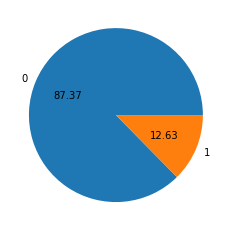

In [102]:
plt.pie(df['target'].value_counts(),labels=['0','1'],autopct="%0.2f")
plt.show()


In [103]:
df['character_count']=df['text'].apply(len)

In [104]:
df['word_count']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [105]:
df['sentence_count']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [106]:
df.head()

,target,text,character_count,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [108]:
df[['character_count','word_count','sentence_count']].describe()

,character_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.455407,1.961308
std,58.236795,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [109]:
df[df['target']==0][['character_count','word_count','sentence_count']].describe()

,character_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459699,17.123339,1.815545
std,56.358868,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [110]:
df[df['target']==1][['character_count','word_count','sentence_count']].describe()

,character_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='character_count', ylabel='Count'>

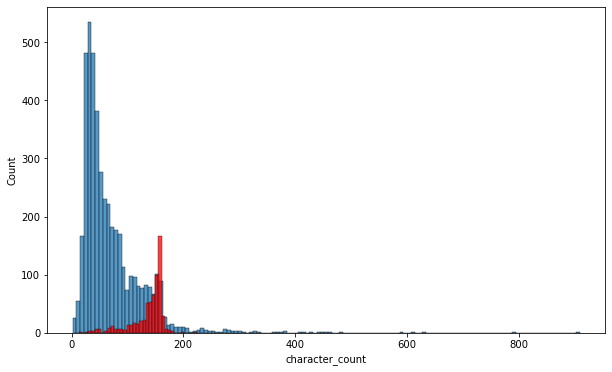

In [120]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['character_count'])
sns.histplot(df[df['target']==1]['character_count'],color='red')


<AxesSubplot:xlabel='word_count', ylabel='Count'>

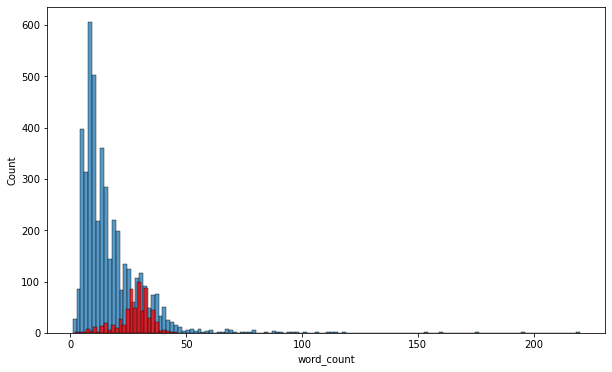

In [119]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['word_count'])
sns.histplot(df[df['target']==1]['word_count'],color='red')


<AxesSubplot:xlabel='sentence_count', ylabel='Count'>

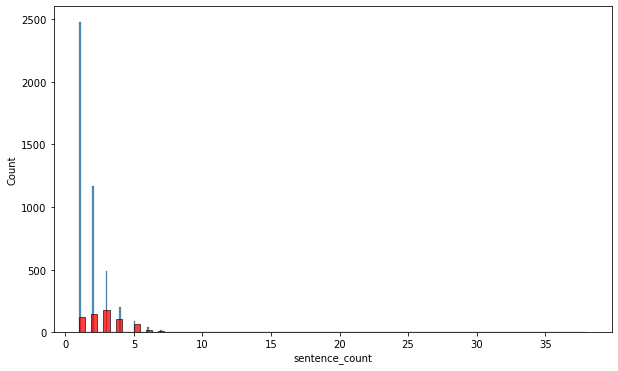

In [121]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['sentence_count'])
sns.histplot(df[df['target']==1]['sentence_count'],color='red')


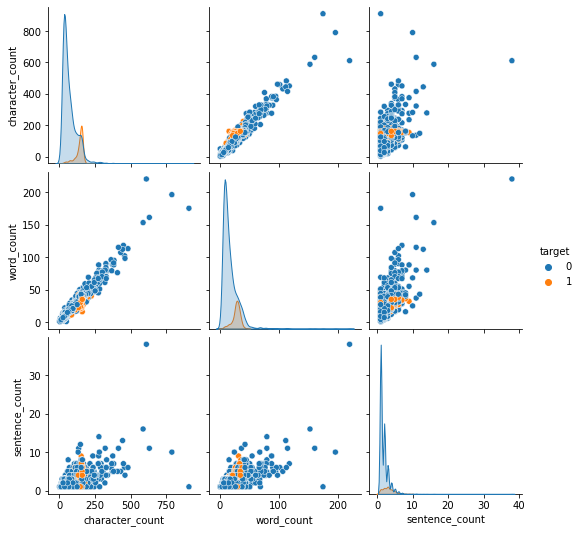

In [122]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

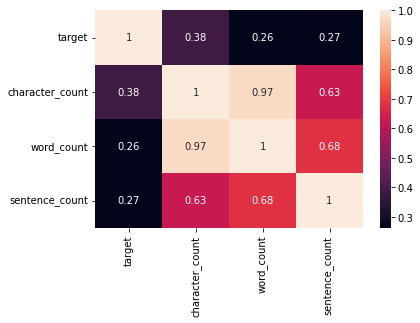

In [126]:
sns.heatmap(df.corr(),annot=True)

## Data Preprocessing

In [128]:
from nltk.corpus import stopwords
stopwords.words('english')#Gives all the stopwords in english language

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [129]:
import string
string.punctuation # gives all punctuation symbols


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [144]:
from nltk.stem.porter import PorterStemmer # for stemming
ps=PorterStemmer()

In [150]:
def text_transformer(text):
    text= text.lower() #convert the text into lower case letters
    text= nltk.word_tokenize(text) #breaks the text into words and return a list of words
    result=[]
    for i in text: #to remove special characters from the text
        if i.isalnum():
            result.append(i)
    text=result[:]
    
    result.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            result.append(i)
    text=result[:]
    result.clear()
    for i in text:
        result.append(ps.stem(i))
    
    return " ".join(result)
            

In [151]:
#Example:
text_transformer('Hi  how are you? %% Sampath eg xx')


'hi sampath eg xx'

In [152]:
text_transformer('Hi you yourself why when what .. !!! ^ how are you? %% Sampath eg xx')


'hi sampath eg xx'

In [153]:
text_transformer('He loved Dancing to Metamorphosis')

'love danc metamorphosi'

In [154]:
text_transformer(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [157]:
#Transforming the dataframe
df['transformed_text']=df['text'].apply(text_transformer)

In [158]:
df.head()

,target,text,character_count,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [167]:

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [168]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

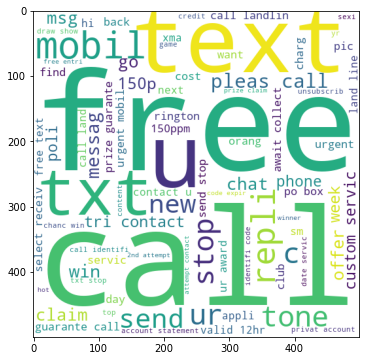

In [169]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [170]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

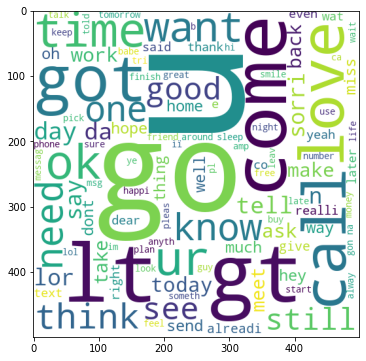

In [171]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [173]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

C:\Users\vatsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


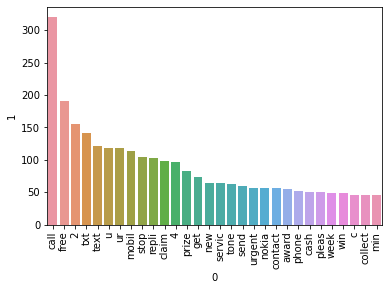

In [174]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [175]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35402

C:\Users\vatsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


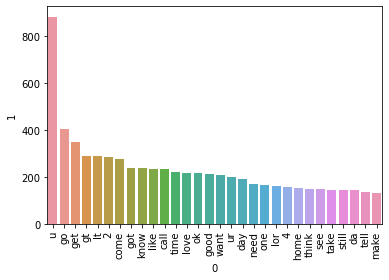

In [176]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000)

In [178]:
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [179]:
y= df['target'].values

In [180]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [181]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [182]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [183]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [184]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [185]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))